In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
db = dm.read_db(base='prices_global.pkl', add=['prices_global_gwx.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Multiasset model

In [451]:
multiasset = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    n_picks=10, 
    assets=setting.assets_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_AGG', 
    start='2002-12-31', 
)


2.620800018310547


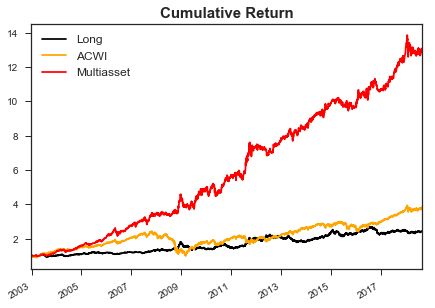

In [460]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum(strats, names=names, color=color, logy=False)

In [457]:
multiasset.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_GlobalTip_loc,1.10,2634,0.89,9.99,0.09,-29.60,2.91,8.38,0.34,0.19,32.03,58.06,0.81,33.53
NatGas,0.01,2866,-30.79,40.81,-0.75,-98.99,-30.88,39.87,-0.79,0.21,79.02,38.52,0.86,89.31
BND_US_Long,2.42,3946,5.77,13.43,0.43,-26.58,6.25,12.66,0.53,-0.28,24.43,55.08,1.22,94.34
Latam,5.79,3946,11.78,32.11,0.37,-67.48,17.97,26.46,0.66,1.41,35.98,56.68,1.18,-35.37
DualMomentum,12.94,3946,17.62,13.54,1.30,-19.40,16.73,11.80,1.35,0.15,1.60,65.78,1.56,93.36


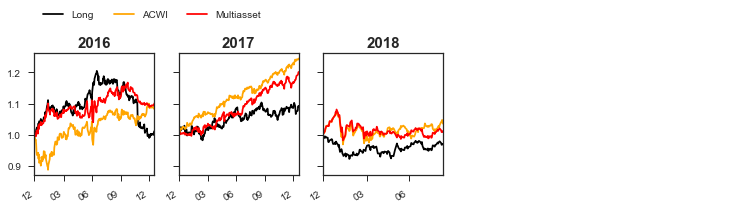

In [461]:
multiasset.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

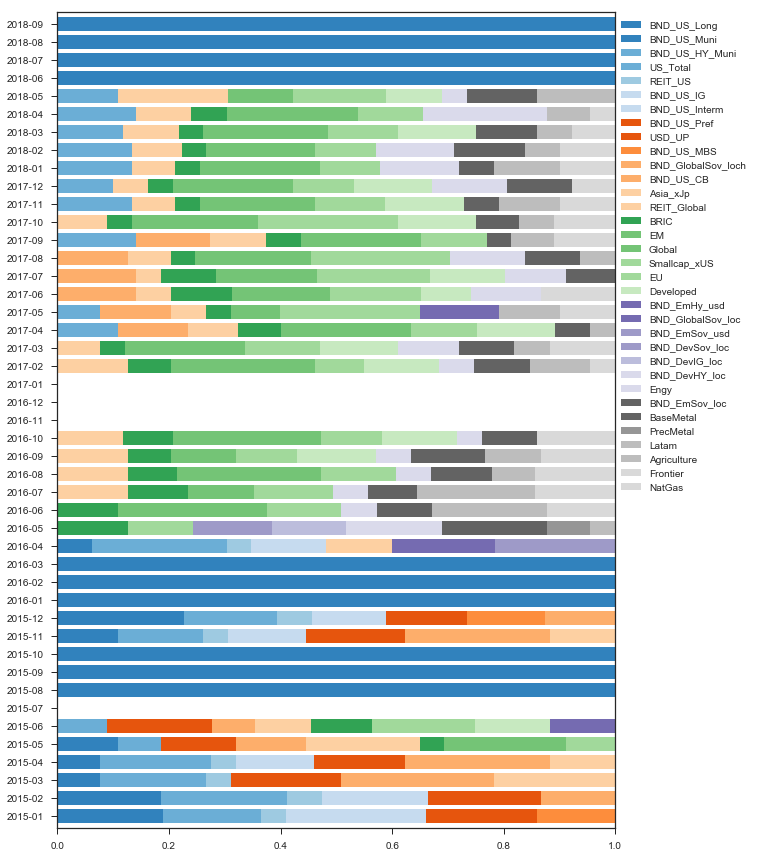

In [462]:
multiasset.plot_weight([2015, 2018])

# Global equity allocation model

In [480]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_AGG', 
    start='2002-12-31', 
)


2.7299997806549072


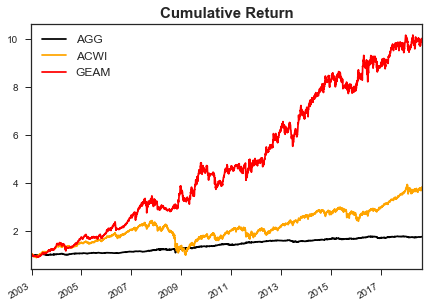

In [481]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [482]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Italy,1.51,3946,2.66,28.21,0.09,-70.38,8.66,23.36,0.40,1.27,39.25,55.08,0.98,-113.57
Indonesia,8.79,3946,14.77,29.99,0.49,-72.14,17.52,28.43,0.68,0.67,28.00,61.50,1.05,37.32
BND_US_Long,2.42,3946,5.77,13.43,0.43,-26.58,6.25,12.66,0.53,-0.28,24.43,55.08,1.22,94.34
Turkey,2.76,3946,6.65,39.91,0.17,-76.62,9.22,33.78,0.28,1.35,41.41,56.68,1.01,-96.08
DualMomentum,9.93,3946,15.66,16.32,0.96,-22.79,15.02,15.36,1.02,0.24,9.76,60.43,1.47,92.78


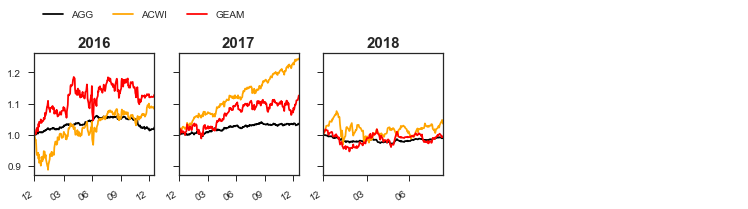

In [483]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

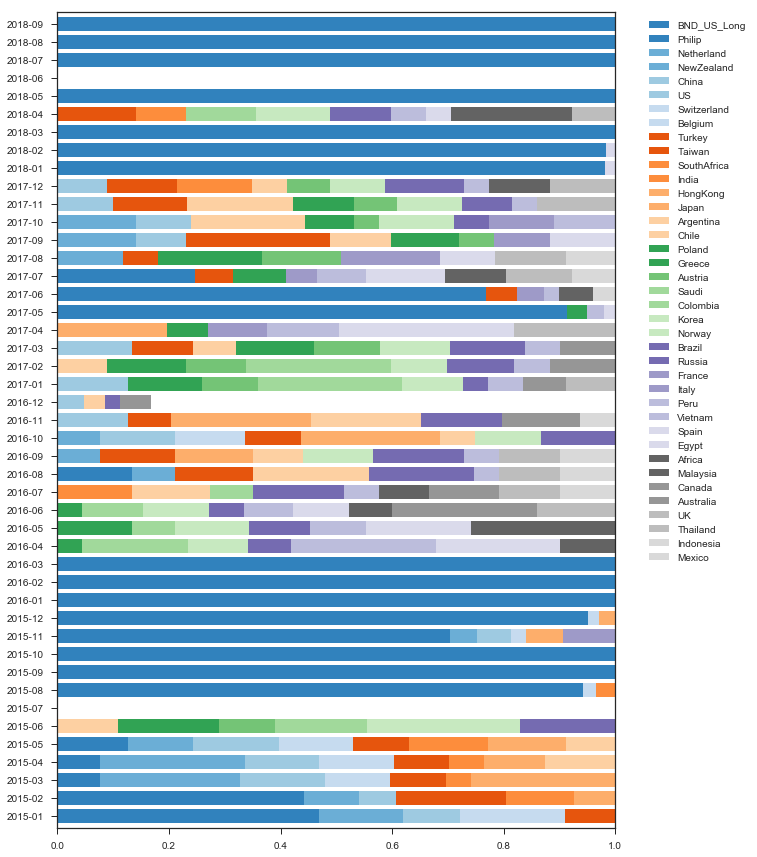

In [484]:
geam.plot_weight([2015, 2018])

# Global sector allocation model

In [485]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_AGG', 
    start='2002-12-31', 
)


2.7923998832702637


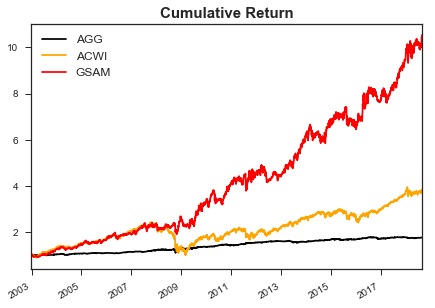

In [493]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [487]:
gsam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Uranium,0.15,1969,-21.41,33.03,-0.65,-90.52,-20.23,30.10,-0.70,1.27,82.91,40.22,1.03,80.83
ConsumerGoods,4.02,3946,9.21,14.45,0.64,-42.64,11.48,11.49,0.99,0.64,13.01,63.10,1.12,91.95
Bio,7.60,3946,13.72,23.58,0.58,-39.25,11.61,21.40,0.57,0.82,25.53,59.36,1.21,84.94
Timber,3.52,3946,8.30,22.09,0.38,-70.67,12.71,15.63,0.74,1.02,27.05,64.17,0.84,33.77
DualMomentum,10.53,3946,16.09,17.10,0.94,-20.56,16.36,14.72,1.05,0.42,6.87,63.64,1.31,98.29


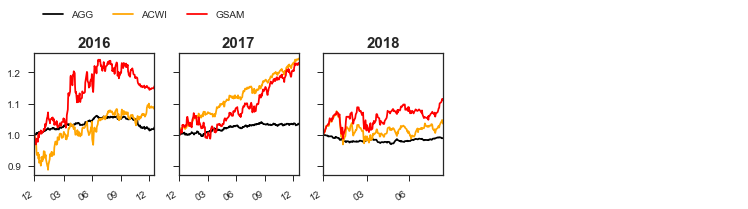

In [494]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

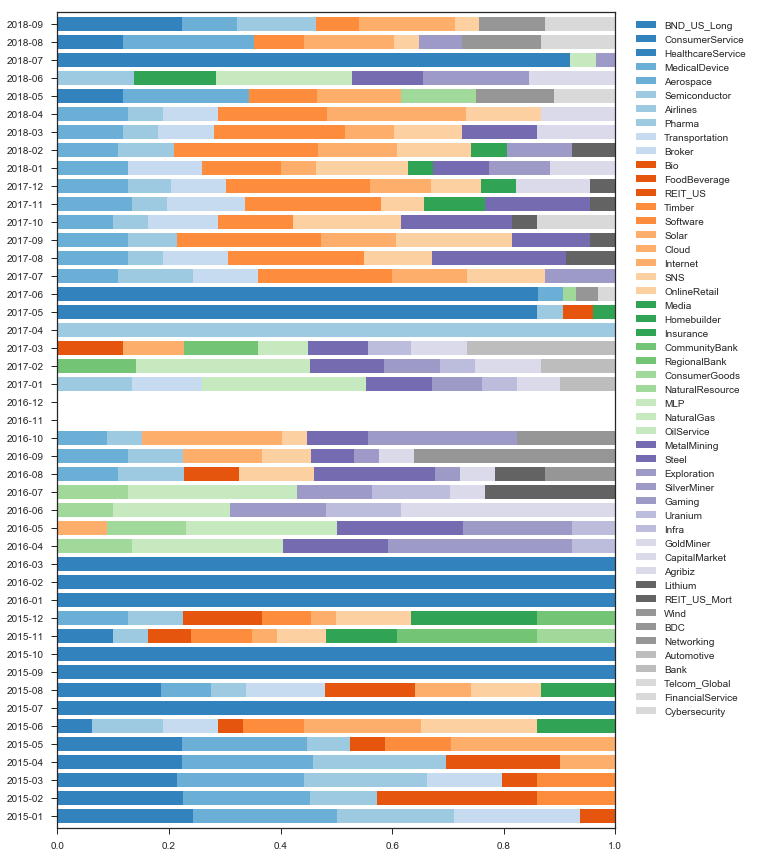

In [490]:
gsam.plot_weight([2015, 2018])

# Global fixed-income allocation model

In [779]:
gfam = q.Backtester(
    setting.base_params(db), 
    w_type='ranky2', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=False, 
    #sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_AGG', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Short', 
    start='2002-12-31', 
)


2.5582849979400635


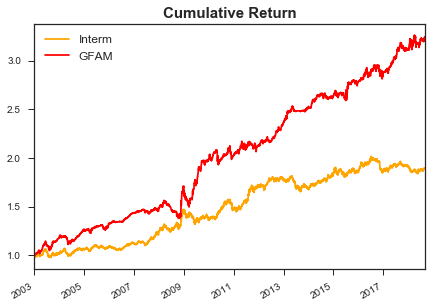

In [780]:
strats = ['BND_US_Interm', 'DualMomentum']
names = ['Interm', 'GFAM']
color = ['orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

In [760]:
gfam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Pref,2.10,3765,5.04,18.60,0.27,-65.55,5.15,6.05,0.89,0.55,16.75,67.98,0.75,71.75
BND_GlobalTip_loc,1.10,2634,0.89,9.99,0.09,-29.60,2.91,8.38,0.34,0.19,32.03,58.06,0.81,33.53
BND_EmSov_loc,1.17,2688,1.50,11.01,0.14,-32.01,3.96,10.20,0.36,0.28,42.31,60.63,0.76,-0.79
BND_US_Long,2.42,3946,5.77,13.43,0.43,-26.58,6.25,12.66,0.53,-0.28,24.43,55.08,1.22,94.34
DualMomentum,3.24,3946,7.74,6.25,1.24,-12.50,5.98,5.36,1.22,0.03,3.14,66.84,1.31,97.18


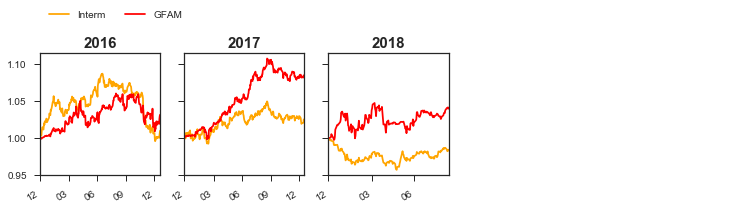

In [761]:
gfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

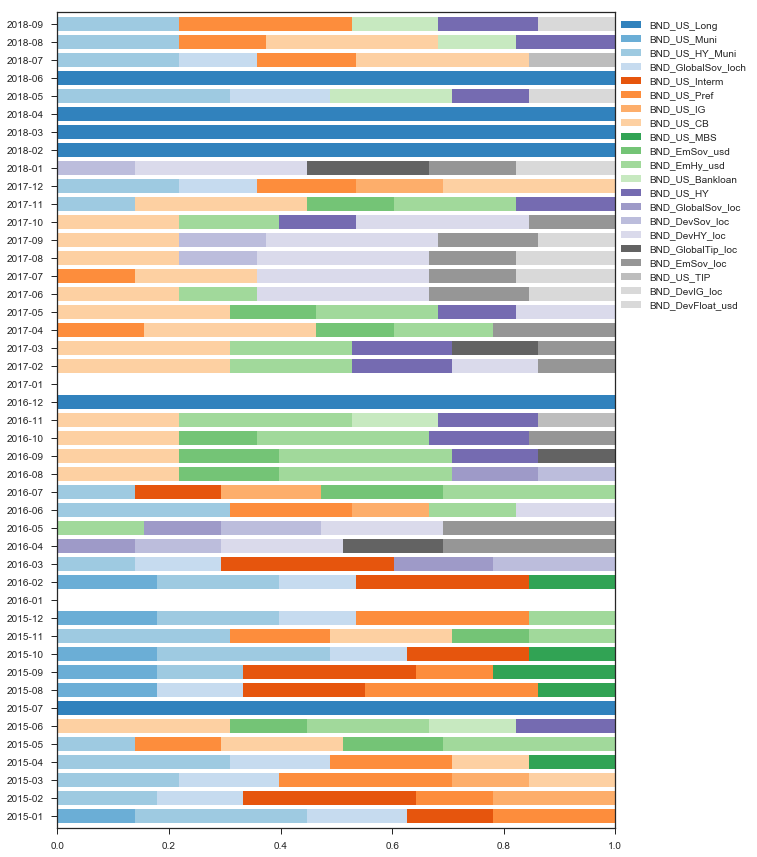

In [762]:
gfam.plot_weight([2015, 2018])

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model

In [12]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, #|setting.assets_us_factor2, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    #trade_assets=[('K200', {'K200L':0.5})], 
    start='2002-12-31', 
)

2.417999744415283


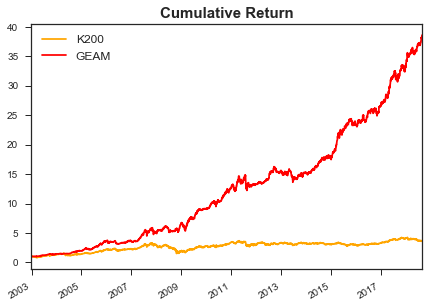

In [13]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

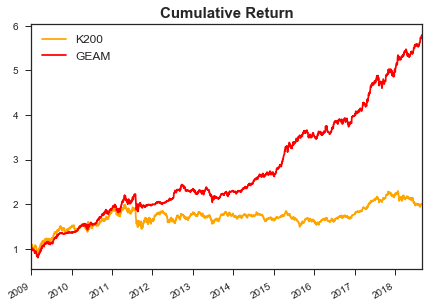

In [1141]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

In [26]:
kfam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ESG_kr,1.30,1512,4.40,10.82,0.41,-16.82,6.09,10.02,0.61,0.19,36.03,57.97,1.09,47.96
HighBeta_kr,5.07,4064,10.51,22.63,0.46,-61.10,11.26,18.50,0.53,0.35,30.54,59.89,1.08,57.07
LowVol_kr,7.60,4064,13.29,16.74,0.79,-43.38,11.72,14.36,0.85,0.25,20.21,58.29,1.41,62.21
Growth_kr,8.54,4064,14.11,19.85,0.71,-57.34,11.43,17.39,0.69,0.32,23.72,60.43,1.26,51.40
DualMomentum,38.60,4064,25.21,14.63,1.72,-21.14,23.71,13.58,2.08,0.10,7.18,72.19,1.39,91.54


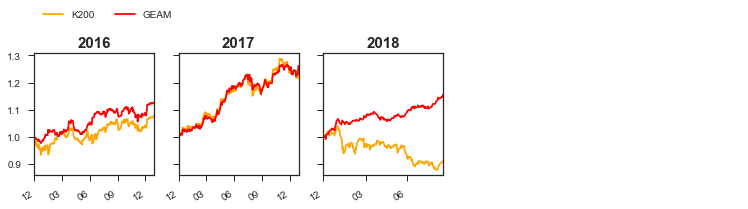

In [52]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

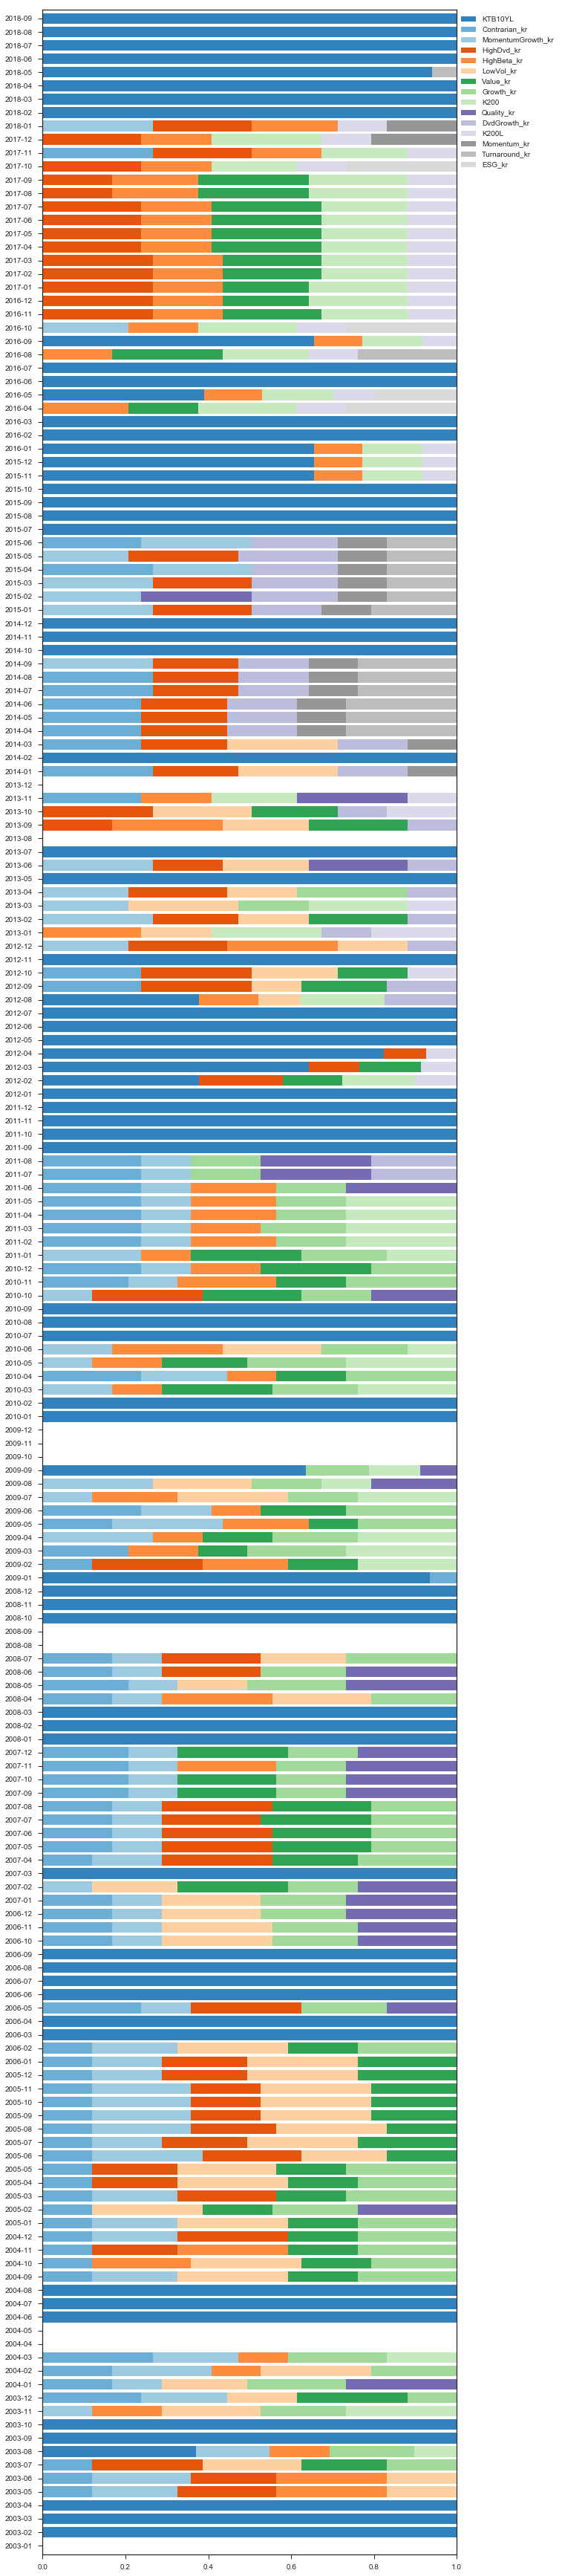

In [54]:
kfam.plot_weight([2003, 2018])

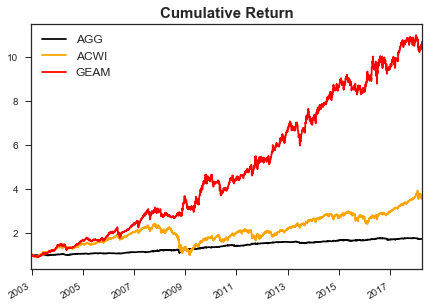

In [140]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

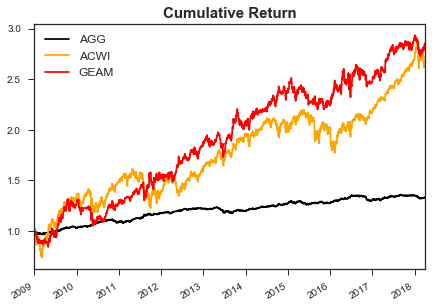

In [79]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [137]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
NewZealand,2.59,3839,6.39,12.28,0.52,-23.20,0.00,11.17,0.82,0.25,8.64,31.32,1.06,64.02
Russia,0.75,2751,-2.62,43.80,-0.06,-81.89,0.06,35.03,0.00,1.65,50.00,49.23,1.14,19.80
Chile,6.02,3839,12.40,23.04,0.54,-60.18,15.28,19.04,0.71,0.81,38.69,55.49,1.31,-45.83
Greece,0.70,1587,-5.37,43.46,-0.12,-77.39,10.20,40.40,0.25,1.65,43.57,51.35,1.04,28.94
DualMomentum,10.69,3839,16.69,15.32,1.09,-21.29,16.64,14.74,1.16,0.20,7.41,63.19,1.43,96.00
